## Mistake Browser

Code to browse the generated mistake labels and provide stats for a synthetic set

In [9]:
import lowlvl
import os
import glob
import pretty_midi
import partitura as pt
import pandas as pd
from utils import parse_mistake_labels_file, load_filenames, SynmistPerformance, show_warping_path

In [10]:
#Path of the generated mistakes
operations_name_map = {'MID_FWDBCKWD': 'forward_backward_insertion',
                       'MID_ROLLBACK': 'rollback', 
                       'MID_WRNG_PRED_INS': 'pitch_change',
                       'MID_DRAG': 'drag',
                       'MID_MISTOUCH': 'mistouch'}

In [11]:
lowlvl.mid_lvl_opers #are those coherent with the paper?? :(

{'MID_FWDBCKWD': 21,
 'MID_ROLLBACK': 25,
 'MID_MISTOUCH': 28,
 'MID_WRNG_PRED_INS': 30,
 'MID_DRAG': 33,
 'DEFAULT_MID': 20}

In [17]:
root = os.path.join('/home/alia/Documents/synthetic-mistake-study/piano-synmist','run8', 'gt_test')
filename = 'CHEN04'

filenames = load_filenames(filename, root)
src_perf = filenames['src_perf']
tgt_perf = filenames['tgt_perf']
mistakelabel_csv = filenames['mistakelabel_csv']
mistake_timemap = filenames['mistake_timemap']
mistakelabel_midi = filenames['mistakelabel_midi']
src_gt_label = filenames['src_gt_label']
tgt_gt_label = filenames['tgt_gt_label']

sp = SynmistPerformance(src_perf, tgt_perf, mistakelabel_csv, mistake_timemap, mistakelabel_midi, src_gt_label, tgt_gt_label)

mistake_windows, mistake_centers = sp.get_mistake_windows(1 ,[val for key, val in operations_name_map.items()]) #1 second recovery buffer.

for key in mistake_windows.keys():
    #maybe a barchart would be better
    print('{}: {}'.format(key, len(mistake_windows[key])))

> /home/alia/Documents/synthetic-mistake-study/piano-synmist/utils.py(267)get_mistake_windows()
    265         return mistake_windows, mistake_centers
    266 
--> 267     #tgt_times should be an array of the time window we want to obtain a src equivalent for.
    268     #we should check entry by entry in the array, and get the nearest point before it if it's > 0+the threshold.
    269     #and return till the first entry which is within timeto+search_resolution_ms.



ipdb>  c


forward_backward_insertion: 10
rollback: 10
pitch_change: 10
drag: 10
mistouch: 10


In [15]:
checker = pd.read_csv('/home/alia/Documents/synthetic-mistake-study/piano-synmist/run6/test/2._Seaside_Stroll-label.csv')

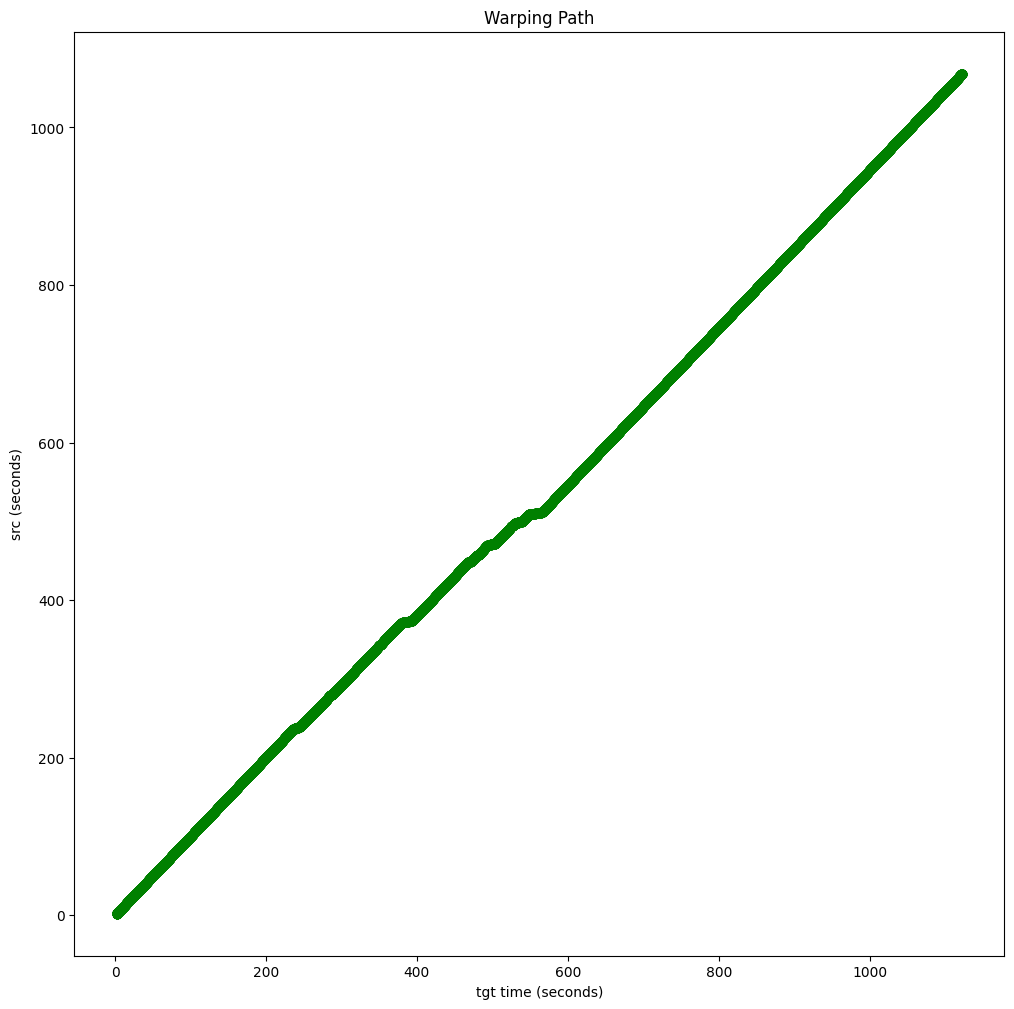

In [18]:
show_warping_path(sp.src_perf, sp.tgt_mistakelabel_midi, sp.mistake_timemap[0])

In [5]:
t = 'run3/synthmistake_out/Bach_Prelude_bwv_854_LuA01M-label.mid'

#Relationship between mistake insertions and characteristics of the input midi are worth noting.
#consider saving the payloads themselves, since this has the 'parameters' of each function. Although each does have some form of randomness, but 
#probably it is enough because all the operations are captured by the labels. 
#it would be nice that some of the random operations be moved to the function call that way we can save them better. 


In [ ]:
#what do I want to see?
#Global stats: per file or per set
#count of mid level mistake types (low level is too much)

In [ ]:
#get time window by mistake type
#then, show the src image, the midi image, and play a snippet of how it sounds. 

In [ ]:
#then, for each type of mid level mistake
#visualize the low level operations it's made of 